# DAB-SMOTE DENSITY BASED CENTERS #
## Authors: Unai Lalana Morales & José Antonio Sanz Delgado ##

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [25]:
def visualize_data(point, labels, X):
    plt.figure(figsize=(6, 6))
    for label in np.unique(labels):
        mask = labels == label
        plt.scatter(X[mask, 0], X[mask, 1], s=10, label=f'Cluster {label}' if label != -1 else 'Noise')
    if point is not None:
        plt.scatter(point[0], point[1], color='red', s=80, marker='*', label='Densest point')
        plt.title("Clusters found by DBSCAN and densest point")
    else:
        plt.title("Clusters found by DBSCAN")
    plt.legend()
    plt.axis('equal')
    plt.show()

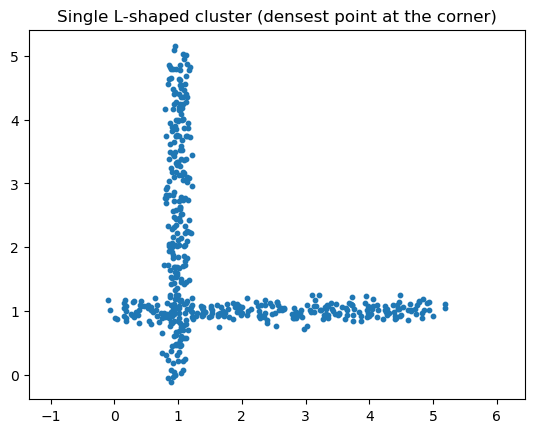

In [19]:
# Horizontal arm of the L (bottom)
x_h = np.linspace(0, 5, 250)
y_h = np.ones_like(x_h)

# Vertical arm of the L (left)
y_v = np.linspace(0, 5, 250)
x_v = np.ones_like(y_v)

# Add small noise to make it more realistic
x_h += np.random.normal(scale=0.1, size=x_h.shape)
y_h += np.random.normal(scale=0.1, size=y_h.shape)
x_v += np.random.normal(scale=0.1, size=x_v.shape)
y_v += np.random.normal(scale=0.1, size=y_v.shape)

# Combine into a single point cloud
X = np.vstack((
    np.column_stack((x_h, y_h)),
    np.column_stack((x_v, y_v))
))

# Visualize
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Single L-shaped cluster (densest point at the corner)")
plt.axis('equal')
plt.show()


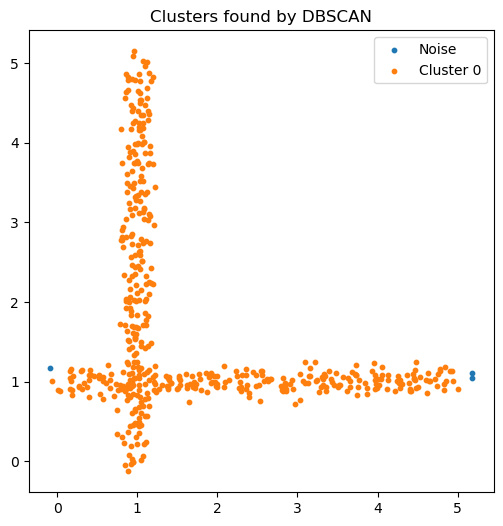

In [31]:
# Apply DBSCAN
eps = 0.2
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

visualize_data(None, labels, X)

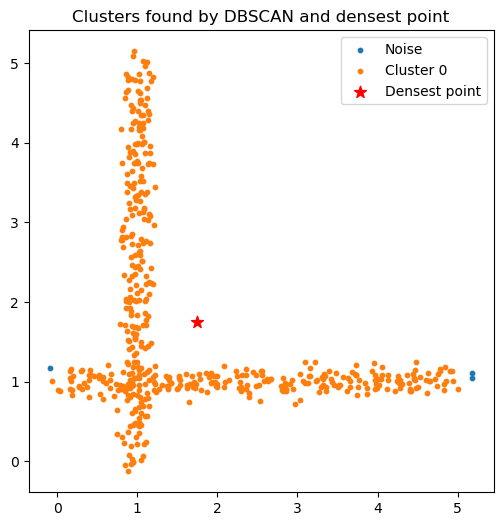

In [28]:
mean_point = np.mean(X, axis=0)
visualize_data(mean_point, labels, X)

In [36]:
Reduced_X = X[dbscan.core_sample_indices_]
nbrs = NearestNeighbors(radius=eps).fit(Reduced_X)
radii_neighbors = nbrs.radius_neighbors(Reduced_X, return_distance=False)

# Count how many neighbors each point has
neighbor_counts = np.array([len(neigh) for neigh in radii_neighbors])

# Find the point with the most neighbors
most_dense_index = np.argmax(neighbor_counts)
most_dense_point = Reduced_X[most_dense_index]

print(f"Densest point: {most_dense_point}")
print(f"Number of neighbors within radius {eps}: {neighbor_counts[most_dense_index]}")


Densest point: [1.01584401 0.96376134]
Number of neighbors within radius 0.2: 32


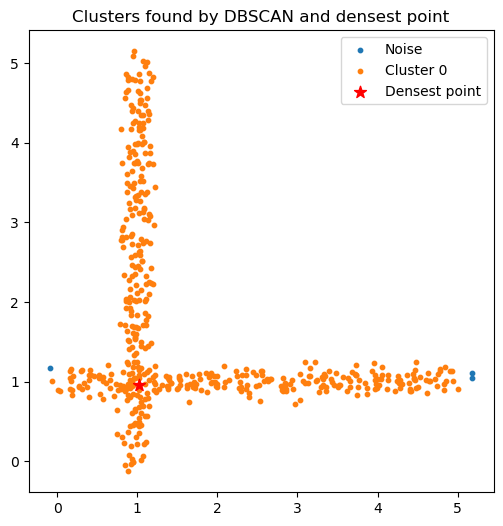

In [37]:
visualize_data(most_dense_point, labels, X)